In [32]:
import torch 
from torch import nn
import matplotlib.pyplot as plt


In [33]:
# Device agnostic code 
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device : {device}")

Using device : cpu


In [34]:
weight = 0.5
bias = 0.2

start = 0 
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(1)
y = weight * X + bias

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                 y,
                                 test_size = 0.2)

In [36]:
def viz(train_data = X_train,
        train_label = y_train,
        test_data = X_test,
        test_label = y_test,
        inference = None) :

    plt.figure(figsize=(14,10))
    plt.scatter(train_data,train_label, color = "red", label = "Training data")
    plt.scatter(test_data,test_label, color = "green", label = "testing data")
    plt.grid(True, linestyle = "--")

    if inference is not None :
        plt.scatter(test_data,inference, color = "black",label = "Testing inference")
    plt.legend() 

In [37]:
class Linear(nn.Module) :
    def __init__(self) -> None:
        super().__init__()   
        self.Linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)

    def forward(self,X):
        return self.Linear_layer(X)        

In [38]:
torch.manual_seed(42)
model = Linear()   
loss_function = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.01)

In [39]:
epoch = 1000

for epoch in range(epoch):
    model.train()
    y_pred = model(X_train)
    optimizer.zero_grad()
    loss_func = loss_function(y_pred,y_train)
    loss_func.backward() 
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_function(test_pred,y_test)
    if epoch%10 == 0:
        print(f"epoch : {epoch} | loss : {loss_func} | test loss : {test_loss}")


epoch : 0 | loss : 0.5837094187736511 | test loss : 0.5507158041000366
epoch : 10 | loss : 0.35055142641067505 | test loss : 0.33084842562675476
epoch : 20 | loss : 0.21055808663368225 | test loss : 0.19881251454353333
epoch : 30 | loss : 0.12650220096111298 | test loss : 0.1195172443985939
epoch : 40 | loss : 0.07603193819522858 | test loss : 0.07189206779003143
epoch : 50 | loss : 0.045726947486400604 | test loss : 0.04328508675098419
epoch : 60 | loss : 0.027529502287507057 | test loss : 0.026099294424057007
epoch : 70 | loss : 0.01660163328051567 | test loss : 0.015772778540849686
epoch : 80 | loss : 0.010038550943136215 | test loss : 0.009566036984324455
epoch : 90 | loss : 0.006096203811466694 | test loss : 0.005833985283970833
epoch : 100 | loss : 0.0037274148780852556 | test loss : 0.003588606370612979
epoch : 110 | loss : 0.002303456421941519 | test loss : 0.0022365059703588486
epoch : 120 | loss : 0.0014468260342255235 | test loss : 0.0014212502865120769
epoch : 130 | loss : 

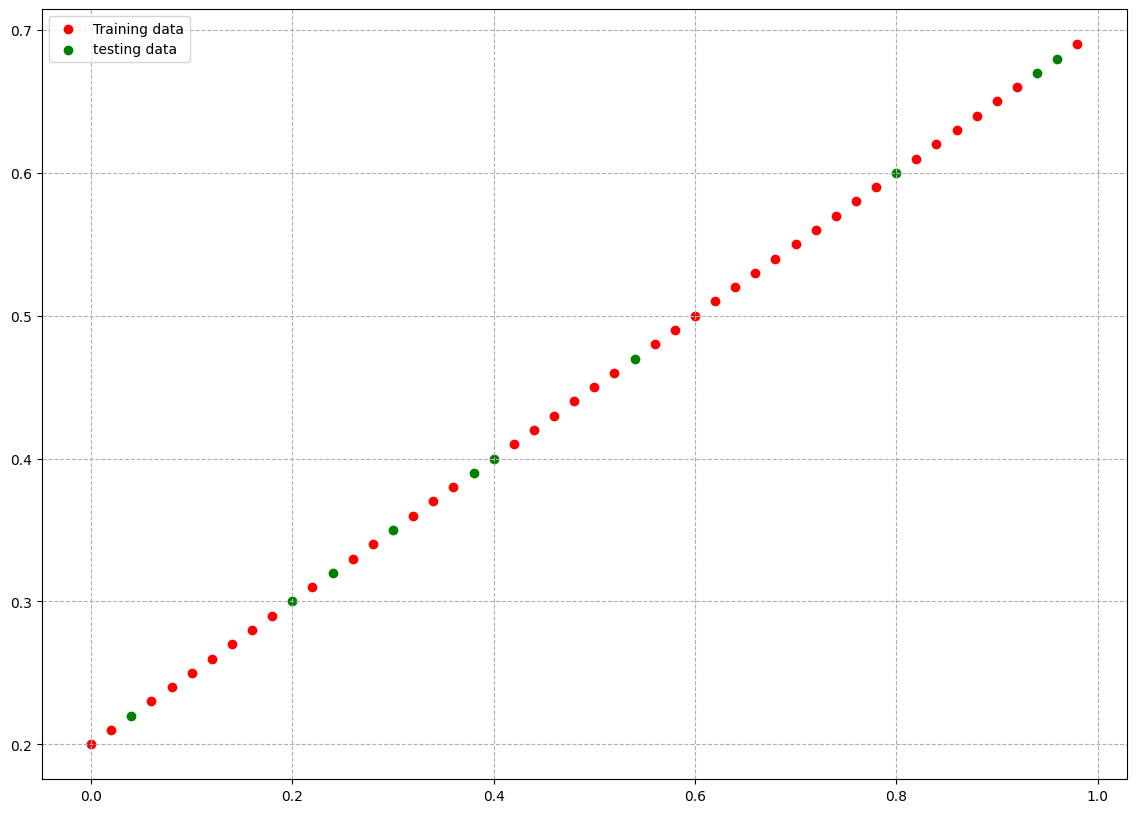

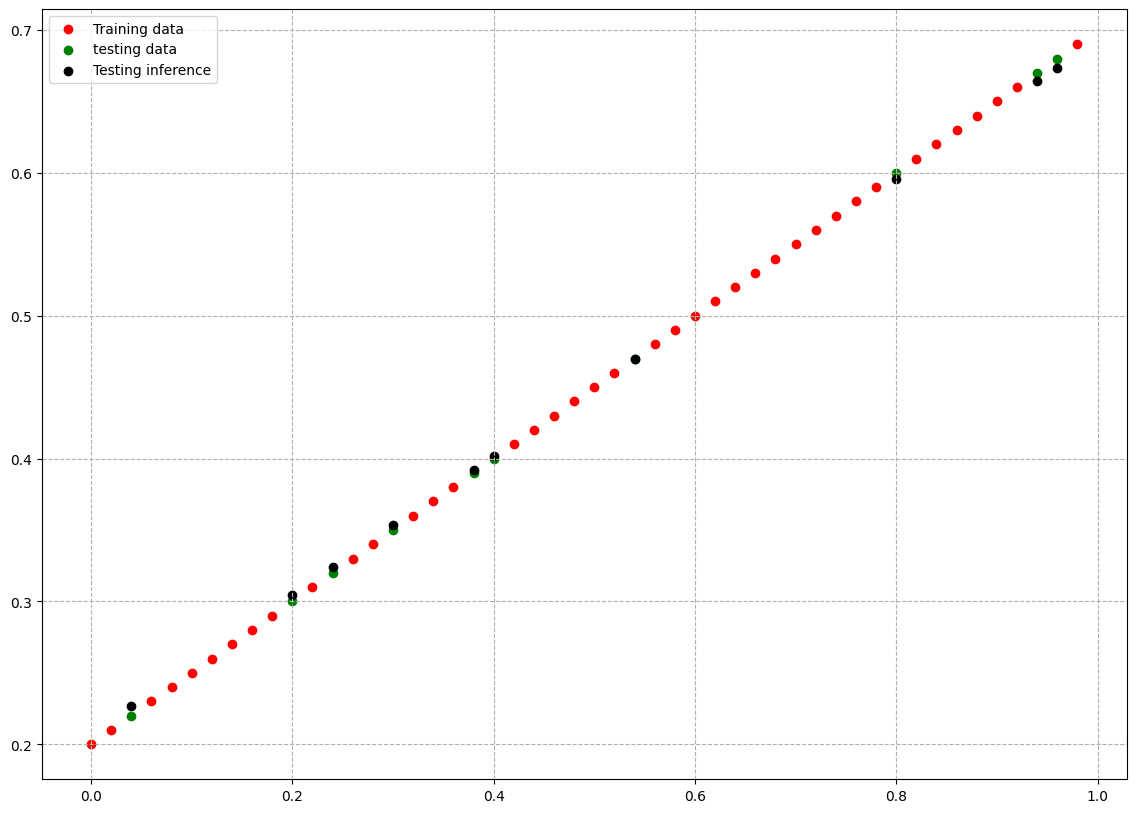

In [40]:
with torch.inference_mode():
    y_pred = model(X_test)
viz(inference=None)
viz(inference=y_pred)

In [64]:
print(f" weight : {weight}        ,                     bias : {bias} \n Model evaluation ----------")
param = model.state_dict()
print(f" model.weight : {param['Linear_layer.weight']} , model.bias : {param['Linear_layer.bias']}")

 weight : 0.5        ,                     bias : 0.2 
 Model evaluation ----------
 model.weight : tensor([[0.4855]]) , model.bias : tensor([0.2076])
